In [1]:
from google.colab import drive
drive.mount('/gdrive')
#Change current working directory to gdrive
%cd /gdrive

Mounted at /gdrive
/gdrive


In [2]:
!pip install pyLDAvis==3.4.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 18.3 MB/s eta 0:00:00


In [3]:
!python -m spacy download en_core_web_lg

2023-04-30 16:15:33.671785: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-30 16:15:35.706246: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [4]:
!pip install joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.0/307.0 kB 5.6 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-learn 1.2.2 requires joblib>=1.1.1, but you have joblib 1.1.0 which is incompatible.
pyldavis 3.4.0 requires joblib>=1.2.0, but you have joblib 1.1.0 which is incompatible.
imbalanced-learn 0.10.1 requires joblib>=1.1.1, but you have joblib 1.1.0 which is incompatible.


In [5]:
!pip install scikit-learn 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 6.4 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [6]:
import os
import pandas as pd
import sklearn
import pyLDAvis
import pyLDAvis.lda_model
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [7]:
file1 = pd.read_csv('/gdrive/My Drive/Balaji_dedupicate_comments.csv')
file2 = pd.read_csv('/gdrive/My Drive/C_deduplicate_comments.csv')
file3 = pd.read_csv('/gdrive/My Drive/Sai_deduplicate_comments.csv')
file4 = pd.read_csv('/gdrive/My Drive/VR_deduplicate_comments.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
df = pd.concat([file1, file2, file3, file4])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0.1,Unnamed: 0,Comment ID,Author,Timestamp,Comment is a reply to,Comment Thread ID,Thread Title,Comment Body,Comment Permalink
0,0.0,0,jbufpp3,robbie-3x,2023-03-11 20:18:01,t3_11optmo,11optmo,Use phone as a mousepad to control s8tablet,There's a little square symbol on your phone's...,/r/GalaxyTab/comments/11optmo/use_phone_as_a_m...
1,1.0,1,jbutwtm,AbleBluebird7806,2023-03-11 22:02:46,t3_11optmo,11optmo,Use phone as a mousepad to control s8tablet,You can get app on playstore that uses Bluetoo...,/r/GalaxyTab/comments/11optmo/use_phone_as_a_m...
2,2.0,2,jbwqvz2,Jalal31091,2023-03-12 08:47:01,t3_11optmo,11optmo,Use phone as a mousepad to control s8tablet,I simply bought a Logitech Bluetooth mouse. Wo...,/r/GalaxyTab/comments/11optmo/use_phone_as_a_m...
3,3.0,3,jbww188,debugg3d,2023-03-12 09:59:56,t3_11optmo,11optmo,Use phone as a mousepad to control s8tablet,"There's an app called Bluetooth, keyboard and ...",/r/GalaxyTab/comments/11optmo/use_phone_as_a_m...
4,4.0,4,jbuio6q,1980ai,2023-03-11 20:39:29,t1_jbufpp3,11optmo,Use phone as a mousepad to control s8tablet,That's if you are using the phone with dex. I...,/r/GalaxyTab/comments/11optmo/use_phone_as_a_m...
...,...,...,...,...,...,...,...,...,...,...
3073,NaN,1055,jcd499t,Professional-Ad-6265,2023-03-15 16:38:00,t1_jca79ab,11rkk1q,Those of you with in screen fingerprint scanne...,Yes,/r/samsung/comments/11rkk1q/those_of_you_with_...
3074,NaN,1056,jcb89kp,Sendbeer,2023-03-15 09:27:20,t1_jcaveyi,11rkk1q,Those of you with in screen fingerprint scanne...,Google trying hard to be apple and simplify th...,/r/samsung/comments/11rkk1q/those_of_you_with_...
3075,NaN,1057,jca7aia,avipars,2023-03-15 05:07:00,t1_jca70jf,11rkk1q,Those of you with in screen fingerprint scanne...,Bad bot,/r/samsung/comments/11rkk1q/those_of_you_with_...
3076,NaN,1058,jca7bm5,B0tRank,2023-03-15 05:07:17,t1_jca7aia,11rkk1q,Those of you with in screen fingerprint scanne...,"Thank you, avipars, for voting on exclaim_bot....",/r/samsung/comments/11rkk1q/those_of_you_with_...


In [10]:
df.drop_duplicates(subset=['Comment Body'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0.1,Unnamed: 0,Comment ID,Author,Timestamp,Comment is a reply to,Comment Thread ID,Thread Title,Comment Body,Comment Permalink
0,0.0,0,jbufpp3,robbie-3x,2023-03-11 20:18:01,t3_11optmo,11optmo,Use phone as a mousepad to control s8tablet,There's a little square symbol on your phone's...,/r/GalaxyTab/comments/11optmo/use_phone_as_a_m...
1,1.0,1,jbutwtm,AbleBluebird7806,2023-03-11 22:02:46,t3_11optmo,11optmo,Use phone as a mousepad to control s8tablet,You can get app on playstore that uses Bluetoo...,/r/GalaxyTab/comments/11optmo/use_phone_as_a_m...
2,2.0,2,jbwqvz2,Jalal31091,2023-03-12 08:47:01,t3_11optmo,11optmo,Use phone as a mousepad to control s8tablet,I simply bought a Logitech Bluetooth mouse. Wo...,/r/GalaxyTab/comments/11optmo/use_phone_as_a_m...
3,3.0,3,jbww188,debugg3d,2023-03-12 09:59:56,t3_11optmo,11optmo,Use phone as a mousepad to control s8tablet,"There's an app called Bluetooth, keyboard and ...",/r/GalaxyTab/comments/11optmo/use_phone_as_a_m...
4,4.0,4,jbuio6q,1980ai,2023-03-11 20:39:29,t1_jbufpp3,11optmo,Use phone as a mousepad to control s8tablet,That's if you are using the phone with dex. I...,/r/GalaxyTab/comments/11optmo/use_phone_as_a_m...
...,...,...,...,...,...,...,...,...,...,...
3071,NaN,1053,jca70jf,exclaim_bot,2023-03-15 05:04:20,t1_jca6zeg,11rkk1q,Those of you with in screen fingerprint scanne...,>Thanks!\n\nYou're welcome!,/r/samsung/comments/11rkk1q/those_of_you_with_...
3072,NaN,1054,jca7ct8,Jozhie,2023-03-15 05:07:36,t1_jca79ab,11rkk1q,Those of you with in screen fingerprint scanne...,Very easy and straightforward.,/r/samsung/comments/11rkk1q/those_of_you_with_...
3074,NaN,1056,jcb89kp,Sendbeer,2023-03-15 09:27:20,t1_jcaveyi,11rkk1q,Those of you with in screen fingerprint scanne...,Google trying hard to be apple and simplify th...,/r/samsung/comments/11rkk1q/those_of_you_with_...
3076,NaN,1058,jca7bm5,B0tRank,2023-03-15 05:07:17,t1_jca7aia,11rkk1q,Those of you with in screen fingerprint scanne...,"Thank you, avipars, for voting on exclaim_bot....",/r/samsung/comments/11rkk1q/those_of_you_with_...


In [11]:
export_csv = df.to_csv('/gdrive/My Drive/FinalCommentsfile.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
import spacy #load spacy
nlp = spacy.load("en_core_web_lg")

def normalize(review, lowercase, remove_stopwords):
    if lowercase:
        review = review.lower()
    doc = nlp(review)
    lemmatized = list()
    for token in doc:
        if not remove_stopwords or (remove_stopwords and not token.is_stop):
            lemmatized.append(token.lemma_)
    return " ".join(lemmatized)

df['Comment Body'] = df['Comment Body'].fillna('')

df['processed'] = df['Comment Body'].apply(normalize, lowercase=True, remove_stopwords=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
# Initialize regex tokenizer
tokenizer = RegexpTokenizer(r'\w+')

# Vectorize document 
cv = CountVectorizer(lowercase=True,
                        stop_words= None,
                        ngram_range = (1,2),
                        tokenizer = tokenizer.tokenize, max_df= 0.95, min_df= 0.0001)

# Fit and Transform the documents
train_data = cv.fit_transform(df['processed']) 
train_data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


<21416x23162 sparse matrix of type '<class 'numpy.int64'>'
	with 395466 stored elements in Compressed Sparse Row format>

In [14]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb
import numpy as np

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
# Define helper functions
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


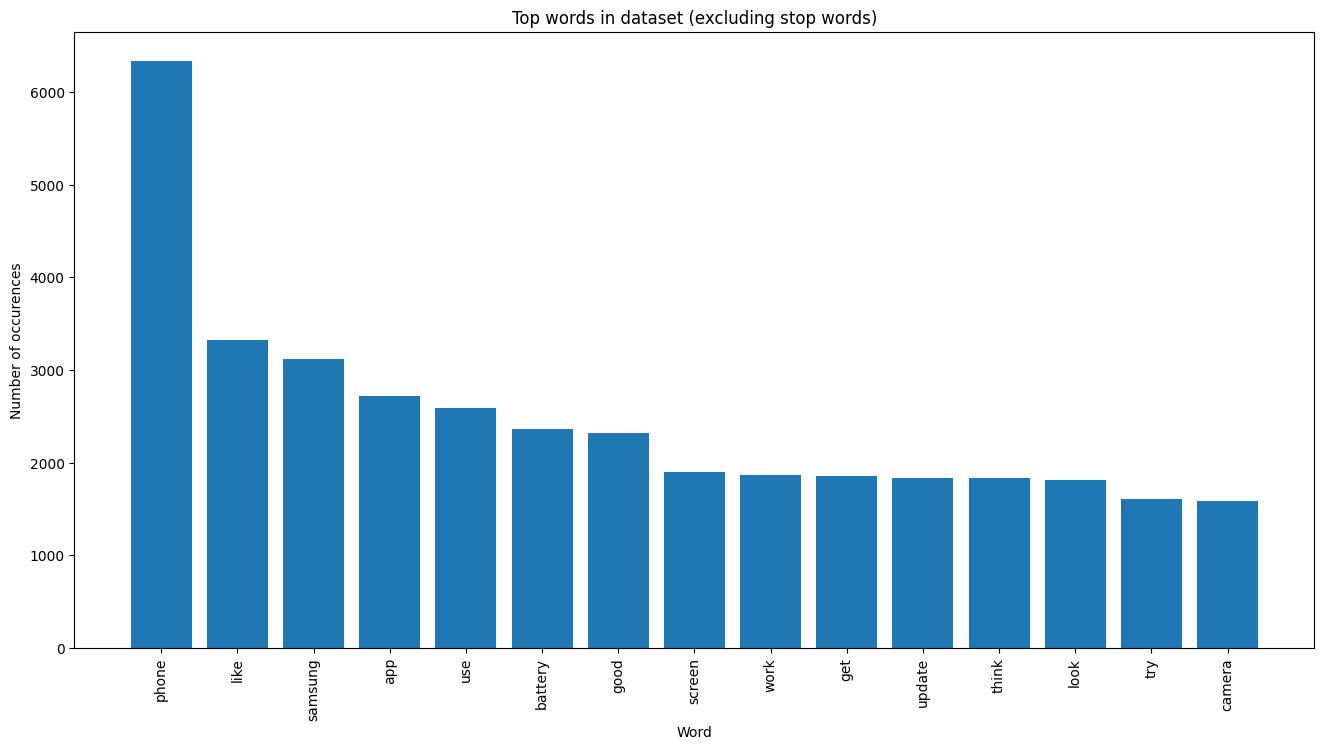

In [16]:
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=cv, 
                                     text_data=df['processed'])

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top words in dataset (excluding stop words)');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()

In [17]:
# Create LDA object
model=LatentDirichletAllocation(n_components=15, random_state= 0, verbose =1, evaluate_every= 5, max_iter= 100)
#model=LatentDirichletAllocation(n_components=10, doc_topic_prior= 0.5, topic_word_prior=0.5, random_state= 0, verbose =1, evaluate_every= 2, max_iter= 50)
#model=LatentDirichletAllocation(n_components=20, doc_topic_prior= 0.04, topic_word_prior=0.08, random_state= 0, verbose =1, evaluate_every= 2, max_iter= 20)
#model=LatentDirichletAllocation(n_components=10, doc_topic_prior = 0.06, random_state= 0, verbose =1, evaluate_every= 5, max_iter= 30)
#model=LatentDirichletAllocation(n_components=20, random_state= 0, verbose =1, evaluate_every= 5, max_iter= 50)
#model=LatentDirichletAllocation(n_components=30, random_state= 0, verbose =1, evaluate_every= 5, max_iter= 50)
#model =LatentDirichletAllocation(n_components=10, doc_topic_prior= 0.5, topic_word_prior=0.5, random_state= 0, verbose =1, evaluate_every= 5, max_iter= 50)
#model =LatentDirichletAllocation(n_components=20, doc_topic_prior= 0.02, topic_word_prior=0.8, random_state= 42, verbose =1, evaluate_every= 5, max_iter= 60)
#model =LatentDirichletAllocation(n_components=15, doc_topic_prior= 0.6, topic_word_prior=0.08, random_state= 32, verbose =1, evaluate_every= 5, max_iter= 70)
#model =LatentDirichletAllocation(n_components=10, doc_topic_prior= 0.02, topic_word_prior=0.04, random_state= 32, verbose =1, evaluate_every= 5, max_iter= 100)
#model=LatentDirichletAllocation(n_components=15, doc_topic_prior= 0.7, topic_word_prior=0.4, random_state= 0, verbose =1, evaluate_every= 2, max_iter= 100)
#model=LatentDirichletAllocation(n_components=15, doc_topic_prior= 0.7, topic_word_prior=0.8, random_state= 0, verbose =1, evaluate_every= 2, max_iter= 70)
#model=LatentDirichletAllocation(n_components=10, doc_topic_prior= 0.3, topic_word_prior=0.5, random_state= 0, verbose =1, evaluate_every= 2, max_iter= 70)


# Fit and Transform LDA model on data
lda_matrix = model.fit(train_data)

# Get Components 
lda_components=model.components_

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


iteration: 1 of max_iter: 100
iteration: 2 of max_iter: 100
iteration: 3 of max_iter: 100
iteration: 4 of max_iter: 100
iteration: 5 of max_iter: 100, perplexity: 4919.8596
iteration: 6 of max_iter: 100
iteration: 7 of max_iter: 100
iteration: 8 of max_iter: 100
iteration: 9 of max_iter: 100
iteration: 10 of max_iter: 100, perplexity: 4451.7236
iteration: 11 of max_iter: 100
iteration: 12 of max_iter: 100
iteration: 13 of max_iter: 100
iteration: 14 of max_iter: 100
iteration: 15 of max_iter: 100, perplexity: 4310.3754
iteration: 16 of max_iter: 100
iteration: 17 of max_iter: 100
iteration: 18 of max_iter: 100
iteration: 19 of max_iter: 100
iteration: 20 of max_iter: 100, perplexity: 4250.1649
iteration: 21 of max_iter: 100
iteration: 22 of max_iter: 100
iteration: 23 of max_iter: 100
iteration: 24 of max_iter: 100
iteration: 25 of max_iter: 100, perplexity: 4218.0930
iteration: 26 of max_iter: 100
iteration: 27 of max_iter: 100
iteration: 28 of max_iter: 100
iteration: 29 of max_iter:

In [18]:
model.perplexity(train_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


4157.262574981601

In [19]:
model.score(train_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


-3750008.7502918905

In [20]:
terms = cv.get_feature_names_out()

for index, component in enumerate(lda_components):
    zipped = zip(terms, component)
    top_terms_key=sorted(zipped, key = lambda t: t[1], reverse=True)[:10]
    top_terms_list=list(dict(top_terms_key).keys())
    print("Topic "+str(index)+": ",top_terms_list)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic 0:  ['https', 'com', 'www', 'https www', 'usb', 'charge', 'reddit', 'samsung', 'r', 'c']
Topic 1:  ['ultra', 's21', 's23', 'battery', 's22', 'phone', 'life', 'well', 'like', 'upgrade']
Topic 2:  ['moon', 'photo', 'image', 'ai', 'picture', 'camera', 'detail', 'like', 'look', 'take']
Topic 3:  ['phone', 'like', 'good', 'people', 'know', 'want', 'look', 'think', 'buy', 'thing']
Topic 4:  ['tab', 's8', 'tablet', 's7', 'work', 'yes', 'ipad', 'use', 'tab s8', 's6']
Topic 5:  ['android', 'phone', 'samsung', 'use', 'device', 'apple', 'like', 'iphone', 'google', 'feature']
Topic 6:  ['update', 'get', '5', '1', 'ui', 'carrier', 'security', 'month', 'patch', '5 1']
Topic 7:  ['headphone', 'card', 'file', 'sd', 'audio', 'jack', 'sd card', 'sound', 'support', 'thank']
Topic 8:  ['phone', '5', 'g', 'gb', 'good', 'galaxy', '8', 'moto', '5 g', '6']
Topic 9:  ['pixel', 'samsung', 'thank', 'trade', 'snapdragon', 'series', 'chip', 's21', 'buy', 'exynos']
Topic 10:  ['message', 'delete', 'samsung', 

In [21]:
pyLDAvis.enable_notebook()

panel = pyLDAvis.lda_model.prepare(model, train_data, cv, mds='tsne')
panel

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pyLDAvis/_prepare.py:244: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
2      -28.127565   23.066023       1        1  11.753367
14    -100.747826    4.430503       2        1  10.732165
3      -35.911419  -85.980263       3        1   9.812488
12      79.141060   49.863136       4        1   8.932804
11     -92.528290  -61.315037       5        1   8.146135
5      -76.185547   59.023289       6        1   6.880726
1       22.513058  -97.745590       7        1   6.478828
8       16.799175   46.944324       8        1   6.476336
9       38.977848  100.131752       9        1   5.534136
13      39.040394   -0.403676      10        1   5.163361
6      100.254669   -8.128910      11        1   5.047965
0       64.678108  -56.691486      12        1   4.837761
7      -48.022236  -23.762886      13        1   4.535284
4        3.102238  -37.178482      14        1   3.194344
10     -25.933121   91.846390      15        1   2.474300, topic_info=          Term         Freq        Total Category  logprob  loglift
2023       app  2584.000000  2584.000000  Default  30.0000  30.0000
21007   update  1730.000000  1730.000000  Default  29.0000  29.0000
2759   battery  2255.000000  2255.000000  Default  28.0000  28.0000
9326     https  1353.000000  1353.000000  Default  27.0000  27.0000
4400       com  1185.000000  1185.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
9071      help    74.100174   481.515918  Topic15  -5.0125   1.8277
3235     break    64.094435   266.044334  Topic15  -5.1575   2.2759
13999  perform    56.435513   126.509145  Topic15  -5.2848   2.8920
11071     list    54.565695   204.323255  Topic15  -5.3185   2.3789
9326     https    56.385080  1353.071471  Topic15  -5.2857   0.5213

[1008 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
0          4  0.212045          0
0          8  0.137997          0
0         10  0.053853          0
0         11  0.434187          0
0         12  0.158192          0
...      ...       ...        ...
23091     10  0.704799          z
23093     10  0.977500     z fold
23106      8  0.994663    zenfone
23109      8  0.977399  zenfone 9
23126      1  0.997208       zoom

[2365 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 15, 4, 13, 12, 6, 2, 9, 10, 14, 7, 1, 8, 5, 11])